# Ehsan Shaghaei B19-AAI-01 e.shaghaei@innopolis.university

In [266]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Task 1 
For the signal :
$$y(t) = sin(2π50t) + sin(2π120t)$$
$$y_ϵ(t) = y(t) + ϵ$$
## 1.1
Discretize the domain $T$ in $n$ evenly spaced subintervals
and visualize both functions.

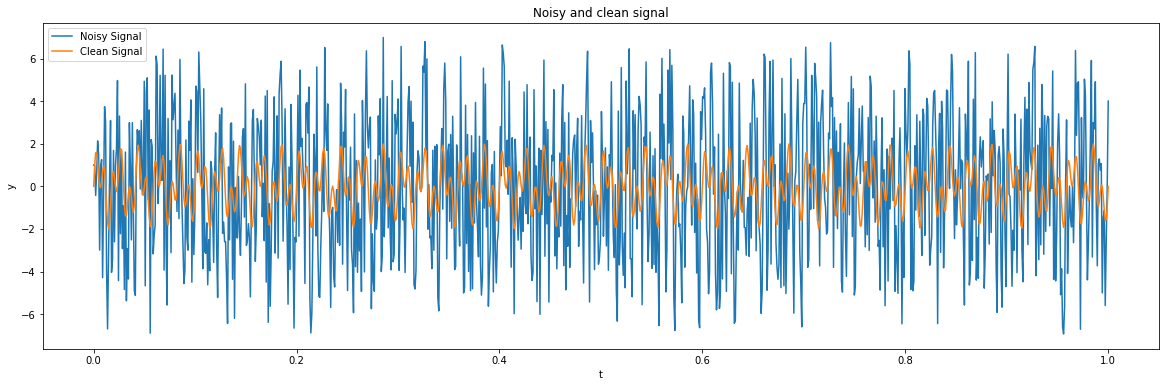

In [267]:
# plotFunc
# @param foo_dict : dictiornary of prefered plotting functions with desiered legend
# @param time_interval: start and stop of the time interval
# @param samples: integer wich defines the number of samples in the time interval
# @param title: prefered title for the plot
def plotFunc(foo_dict: dict, time_interval, samples, title):
    time_axis = np.linspace(time_interval[0], time_interval[1], samples)
    for legend, foo in foo_dict.items():
        foo_axis = np.vectorize(foo)(time_axis)
        plt.plot(time_axis, foo_axis, label=legend)
    plt.title(title)
    plt.ylabel('y')
    plt.xlabel('t')
    plt.legend(loc='best')
    plt.show()

# definition of clean signal y(t)
def y(t):
    return np.sin(2*np.pi*50*t)+np.sin(2*np.pi*120*t)

# definition of noise channel
def noise_channel():
    return np.random.randint(-5, 5+1)


# definition of noisy signal y(t)
def y_eps(t):
    return y(t)+noise_channel()


# set figure size
plt.figure(figsize=(20, 6))

funcs = {
        "Noisy Signal": y_eps,
        "Clean Signal": y
         }
plotTitle = "Noisy and clean signal"
T=1
N_samples = 2**10
timeRange = [0, T]

plotFunc(funcs, timeRange, N_samples, plotTitle)


## 1.2 Compute the Fast Fourier Transform of the discretized function $y_ϵ(t)$

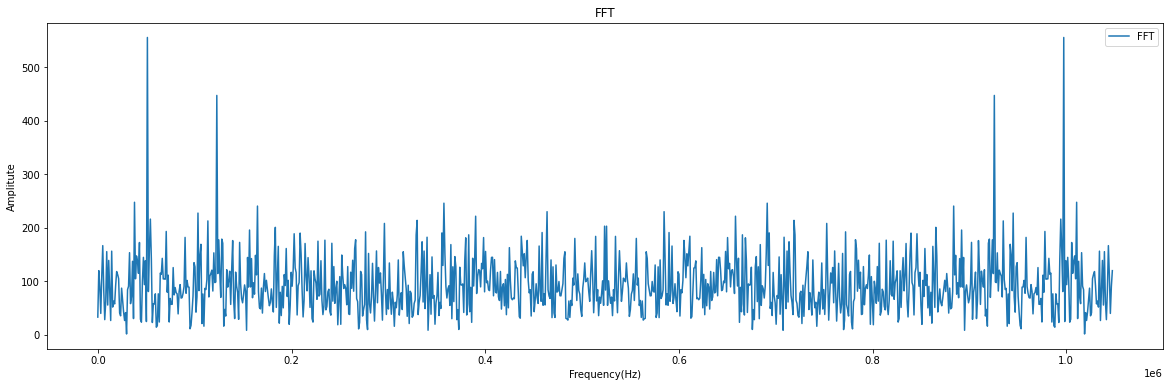

In [268]:
time_axis = np.linspace(timeRange[0], timeRange[1], N_samples)
y_eps_axis = np.vectorize(y_eps)(time_axis)


def FFT(f):
    N = len(f)

    if N == 1:
        return f
    else:
        F_even = FFT(f[::2])
        F_odd = FFT(f[1::2])
        term = np.exp(-2j*np.pi*np.arange(N) / N)
        F = np.concatenate([
            F_even+term[:int(N/2)]*F_odd,
            F_even+term[int(N/2):]*F_odd
        ])
        return F


T = (timeRange[1]-timeRange[0])/N_samples
frequency_axis = np.arange(N_samples)/T
fft_y_eps = FFT(y_eps_axis)
# set figure size
plt.figure(figsize=(20, 6))
plt.plot(frequency_axis, abs(fft_y_eps),label='FFT')
plt.legend()
plt.title('FFT')
plt.ylabel('Amplitute')
plt.xlabel('Frequency(Hz)')
plt.show()


## 1.3 Compute the power density spectrum (PSD) of z by multiplying it element-wise by its conjugate, and dividing it by the number of points n then visualize the PSD

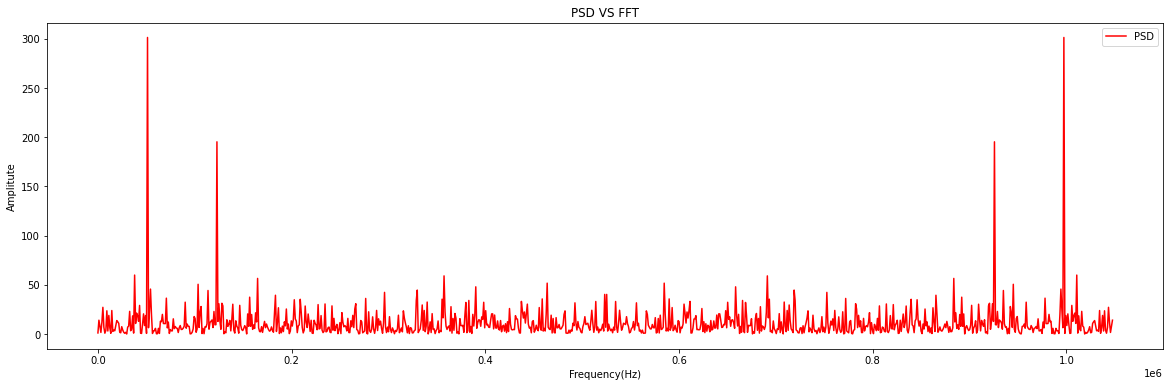

In [269]:
def FFT2PSD(fft):
    N=len(fft)
    fft_bar = np.conj(fft)
    return (fft*fft_bar)/N

psd_axis = FFT2PSD(fft_y_eps)
# set figure size
plt.figure(figsize=(20, 6))
plt.plot(frequency_axis, abs(psd_axis), 'r',label='PSD')
plt.ylabel('Amplitute')
plt.xlabel('Frequency(Hz)')
plt.legend()
plt.title('PSD VS FFT')
plt.show()


## 1.4 Based on your observations set a PDS-threshold τ to keep just the most representative frequencies,i.e. just keep the elements in the PDS that are less than threshold τ

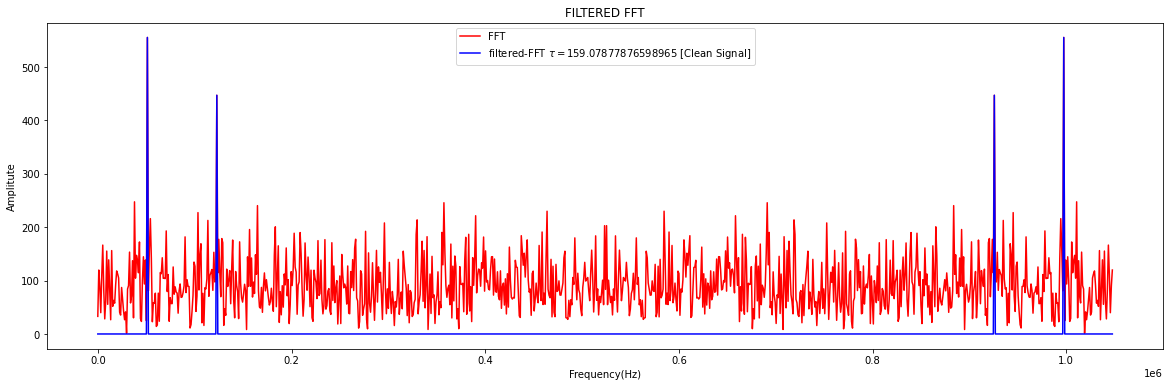

In [270]:
t = abs(psd_axis)
bag_ratio = .04

def filter(signal,psd,bag_ratio):
    sorted_signal = np.sort(signal)
    n_bag = int(len(signal)*bag_ratio)
    tau = abs(np.sum(sorted_signal[-1:-1-n_bag:-1])/n_bag)

    filtered_signal = []
    for i,sample in enumerate(psd):
        filtered_signal.append(0 if abs(sample)<tau else signal[i])
    return np.array(filtered_signal),tau

filtered_fft,tau = filter(fft_y_eps,psd_axis,bag_ratio)

# set figure size
plt.figure(figsize=(20, 6))
plt.plot(frequency_axis, abs(fft_y_eps), 'r',label='FFT')
plt.plot(frequency_axis, abs(filtered_fft), 'b',label=f'filtered-FFT $\\tau=${tau} [Clean Signal]')
plt.ylabel('Amplitute')
plt.xlabel('Frequency(Hz)')
plt.legend()
plt.title('FILTERED FFT')
plt.show()


## 1.5 Return to the discretized function, and using the indices as a filter set to zero the elements whose index is not in your set of indices, and compute the Inverse Fast Fourier Transform, which is your reconstructed function

C:\Users\Ahuratus\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


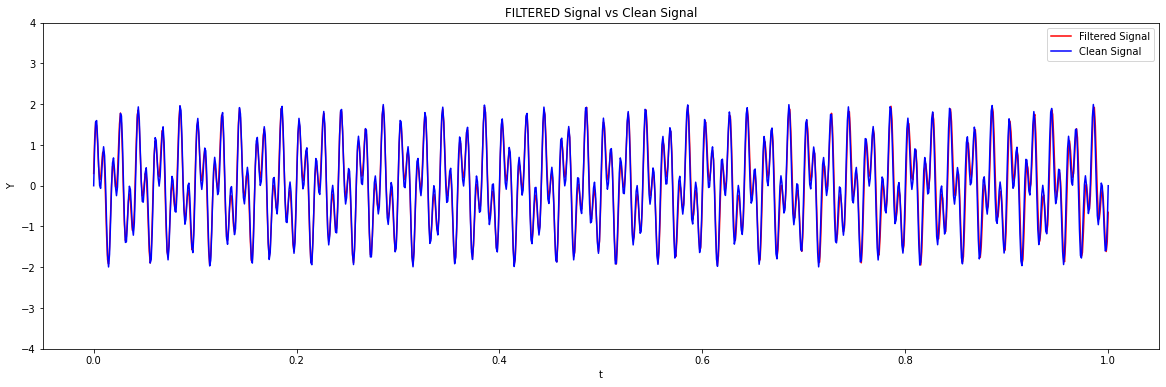

In [271]:

filtered_signal = np.fft.ifft(filtered_fft)
clean_signal = np.array([y(t) for t in time_axis])

# set figure size
plt.figure(figsize=(20, 6))
plt.plot(time_axis, filtered_signal, 'r',label='Filtered Signal')
plt.plot(time_axis, clean_signal, 'b',label='Clean Signal')
plt.ylabel('Y')
plt.xlabel('t')
plt.ylim((-4,4))
plt.legend()
plt.title('FILTERED Signal vs Clean Signal')
plt.show()


# Task 2 Image Compression

## 2.1 Visualize your image, and convert it from RGB format to a grayscale format, i.e. the dimensions of your original picture (thinking of it as a three dimensional array) will be reduced one dimension where w, h, and c stand for weight, height and channel, respectively.

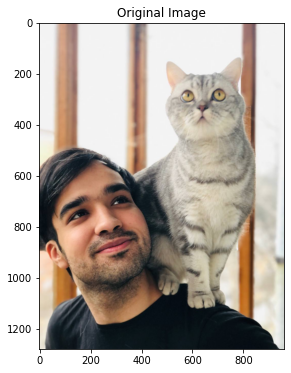

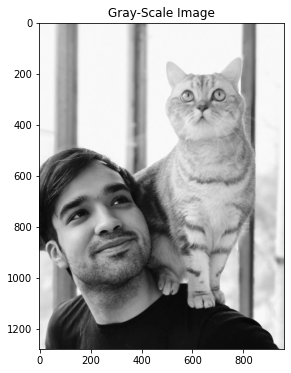

In [272]:
path = './IMG.JPG'
img = plt.imread(path)
plt.figure(figsize=(8,6))
plt.title('Original Image')
plt.imshow(img)

# using the formula used in the matplotlib colormap
# https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def rgb2grayscale(rgb_img):
    return np.dot(rgb_img[...,:3], [0.2989, 0.5870, 0.1140])

img_grayscale = rgb2grayscale(img)


plt.figure(figsize=(8,6))
plt.title('Gray-Scale Image')
plt.imshow(img_grayscale,'gray')
plt.show()

## 2.2 Compute the Fast Fourier Transform in two dimensions (since you are working now with a two dimensional array) to get the spectrum of your image, then shift the zero-frequency to the center of that spectrum

In [273]:
img_fft = np.fft.fft2(img_grayscale)
img_shifted_fft = np.fft.fftshift(img_fft)


## 2.3  Compute the magnitude (a.k.a. module, absolute value, etc) of the shifted spectrum to work with an homogeneous spectrum

In [274]:
modulus_img_shifted_fft = abs(img_shifted_fft)

## 2.4 Compute the (natural) logarithm adding 1 to the argument of your spectrum (to avoid values close to 0 that could make the operation to blow up)


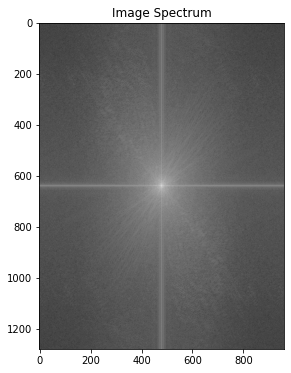

In [275]:
log_signal = np.log(modulus_img_shifted_fft+1)


plt.figure(figsize=(8,6))
plt.title('Image Spectrum')
plt.imshow(log_signal,'gray')
plt.show()

## 2.5  Reduce the dimension of your original shifted matrix in one array of one single dimension with the length being the product of the weight and the height

In [276]:
print('Log Signal Shape',log_signal.shape)
flatten_spec = log_signal.flatten()
print(log_signal.shape[0],' X ',log_signal.shape[1],' = ', log_signal.shape[0]*log_signal.shape[1])
print('Flatten Log Signal Shape',flatten_spec.shape)


Log Signal Shape (1280, 960)
1280  X  960  =  1228800
Flatten Log Signal Shape (1228800,)


## 2.6 Compute the magnitute of the flatten signal

In [277]:
modulus_flatten_spec = abs(flatten_spec)

## 2.7 Sort the flattened array

In [278]:
sorted_spec = np.sort(modulus_flatten_spec)

## 2.8 Set a value for τ , it should be sufficiently small, i.e. τ ≪ 1, multiply it by the length of your array to keep the values that are useful for the reconstruction, then floor the computation (i.e. approximate it to the smaller integer)

In [279]:
tau = 0.01
wh=len(sorted_spec)
b = np.floor((1-tau)*wh).astype(np.int32)
wh,b

(1228800, 1216512)

## 2.9 Define your threshold as that number whose index is given by b in your sorted array.

In [280]:
threshold = sorted_spec[b]

## 2.10 Zero out all small coefficients by keeping just the indices of the elements of signal that are above the threshold.


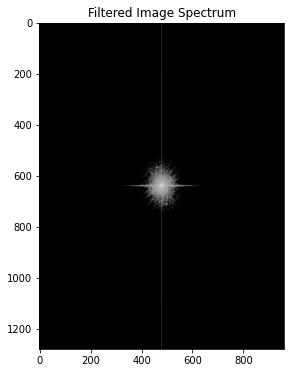

In [281]:

def filter(signal,judge_signal,threshold):
    filtered_signal = []
    for i,sample in enumerate(judge_signal):
        filtered_signal.append(0 if abs(sample)<threshold else signal[i])
    return np.array(filtered_signal)

filtered_img = filter(modulus_flatten_spec,modulus_flatten_spec,threshold)
reshaped_filtered_img = np.reshape(filtered_img,img_grayscale.shape)
indices = reshaped_filtered_img > threshold

plt.figure(figsize=(8,6))
plt.title('Filtered Image Spectrum')
plt.imshow(reshaped_filtered_img,'gray')
plt.show()

# 2.11 Finally return to your initial matrix and select those indices and apply the shifting, absolute value and the logarithm as before and display it


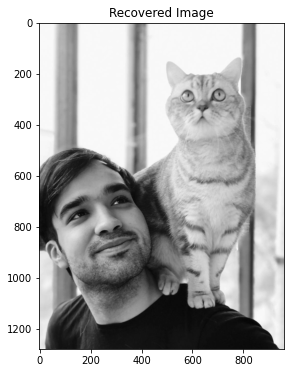

In [283]:

compressed_data =  np.log(np.abs(img_shifted_fft)+1)*indices
recovered_image = np.fft.ifftshift(compressed_data)
recovered_image = abs(np.fft.ifft2(img_shifted_fft))
plt.figure(figsize=(8,6))
plt.title('Recovered Image')
plt.imshow(recovered_image.real,'gray')
plt.show()